In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [1]:
#General parameters
years = 3
time = int(261 * years)


#Import parameters
n = int(261 * np.random.uniform(0, 15))
path = "data/MSCI_World.csv"
limit = slice(n, time+n)


#Trade parameters
trades = 10 * years
max_trades = 20 * years
hold_time = [30,5,5,0]
time_after_reversel = 0
smooth_period = 20

trade_cost = [1,0]
spread = 0.002
tax_rate = 0.25
tax_allowance = 1000

initial_investment = 5000
saving_plan_period = 22
saving_plan = {12*i+1: 500 * 1.0**(i*12) for i in range(0,years)}
#saving_plan = 500


chim =  ChartImport(  initial_investment=initial_investment, saving_plan=saving_plan, saving_plan_period=saving_plan_period, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, trade_cost=trade_cost, spread=spread, tax_rate=tax_rate, tax_allowance=tax_allowance
                      )

performance, dates = chim.load_data(path=path, limit=limit)

buy_and_hold_performance = chim.buy_and_hold()[0]
random_swing_performance_analyse = chim.random_swing_trade()[0]
swing_performance_analyse = chim.swing_trade()[0]


NameError: name 'np' is not defined

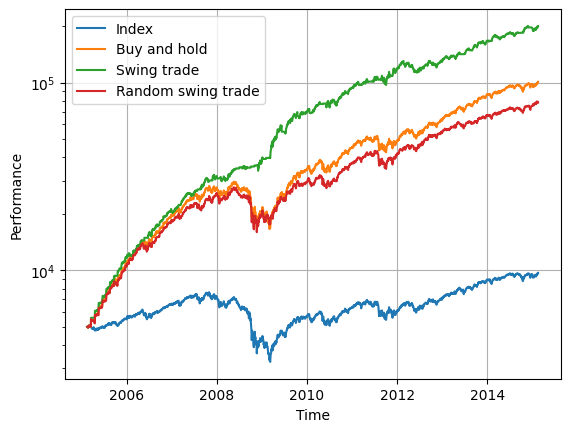

Initial invetment:  5000
Total Investment:  64000.0

Index performance:
    Absolute: 9699.51, Relative: 1.94
    Yearly performance: 1.07

Buy and hold return:
    Absolute: 101205.29, Relative: 1.58
    Yearly performance: 1.05, Internal rate of return: 1.08
    Taxes: 0, Transaction cost: 129.0

Swing trade return:
    Absolute: 200718.13, Relative: 3.14
    Yearly performance: 1.12, Internal rate of return: 1.2
    Taxes: 43890.01, Transaction cost: 7232.12

Random swing trade return:
    Absolute: 78432.7, Relative: 1.23
    Yearly performance: 1.02, Internal rate of return: 1.04
    Taxes: 8661.06, Transaction cost: 5354.51



In [ ]:
plt.plot(dates, performance, label="Index")
plt.plot(dates, buy_and_hold_performance, label="Buy and hold")
plt.plot(dates, swing_performance_analyse, label="Swing trade")
plt.plot(dates, random_swing_performance_analyse, label="Random swing trade")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

plt.yscale("log")

plt.show()

#chim.print_parameters()
chim.print_results()
#chim.plot_performance()

In [4]:
mc = MonteCarloSimulation(chartimp=chim, parallel=True)
_ = mc.mc_import_chart(n=2000, stepsize=2, path=path, limit=limit)

# mc.hist_performance(limits=None, bins=30)

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [02:59<00:00, 11.16it/s]


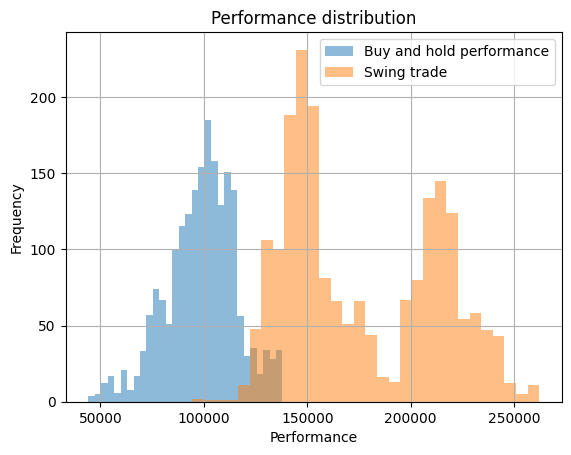

Initial invetment:  5000
Total money invested:  64000.0

Index performance:
  Overall return: 10282.367 +/- 3184.262 (Median: 10220.659)
  Relative performance: 2.056 +/- 0.637 (Median: 2.044)
  Yearly performance: 1.07 +/- 0.036 (Median: 1.074)

Buy and hold return:
  Overall return: 98917.714 +/- 16959.246 (Median: 100405.846)
  Relative performance: 1.546 +/- 0.265 (Median: 1.569)
  Yearly performance: 1.043 +/- 0.019 (Median: 1.046)
  Internal rate of return: 1.076 +/- 0.033 (Median: 1.082)
  Taxes: 0.0 +/- 0.0 (Median: 0.0)
  Transaction cost: 128.998 +/- 0.0 (Median: 128.998)

Swing trade return:
  Overall return: 176577.314 +/- 36472.385 (Median: 164377.061)
  Relative performance: 2.759 +/- 0.57 (Median: 2.568)
  Yearly performance: 1.105 +/- 0.023 (Median: 1.099)
  Internal rate of return: 1.176 +/- 0.035 (Median: 1.168)
  Taxes: 37136.665 +/- 11068.491 (Median: 33957.973)
  Transaction cost: 6126.977 +/- 851.976 (Median: 5981.215)

Random swing trade return:
  Overall return:

In [6]:
bins=30
limits=None

#plt.hist(mc.index_performance, bins=bins, range=limits, alpha=0.5, label="Index Performance")
plt.hist(mc.buy_and_hold_profit, bins=bins, range=limits, alpha=0.5, label="Buy and hold performance")
plt.hist(mc.swing_profit, bins=bins, range=limits, alpha=0.5, label="Swing trade")
#plt.hist(mc.random_swing_profit, bins=bins, range=limits, alpha=0.5, label="Random swing trade")

plt.xlabel("Performance")
plt.ylabel("Frequency")
plt.title("Performance distribution")

plt.grid()
plt.legend()
plt.show()

mc.print_results(accuracy=3)